# <div style="text-align: center; margin-top:2em; margin-bottom:1em">ESTADÍSTICA PARA INGENIERÍA Y CIENCIAS</div>
## <div style="text-align: center; margin-bottom:1em">PRÁCTICA 2 : Prueba Ji-cuadrado, Tablas de contingencia, bondad de ajuste</div>
## <div style="text-align: center; margin-bottom:1em">Ivan Svetlich</div>

***
<br></br>

In [2]:
#Librerias
library(IRdisplay)
library(ggplot2)

### **Ejercicio 1**

#### <div style="text-align: justify">Se realizan pruebas acerca de la proporción de vaciados defectuosos producidos por 5 moldes diferentes. Si hubiera 14 defectuosos entre 100 vaciados hechos con el molde 1, 33 defectuosos entre 200 vaciados hechos con el molde 2, 21 defectuosos entre 180 vaciados hechos con el molde 3, 17 defectuosos entre 120 vaciados hechos con el molde 4 y 25 defectuosos entre 150 vaciados hechos con el molde 5, use el nivel de significancia 0.01 para probar si la verdadera proporción de defectuosos es la misma para cada molde.</div>

| Categoría | Vaciados correctos | Vaciados defectuosos | **Total** |
|---|:---:|:---:|:---:|
| Molde 1 | 86 | 14 | **100** |
| Molde 2 | 167 | 33 | **200** |
| Molde 3 | 159 | 21 | **180** |
| Molde 4 | 103 | 17 | **120** |
| Molde 5 | 125 | 25 | **150** |
<div style="text-align: center"><i>Valores observados</i></div>

Sean $r = 5$ el número de filas y $c = 2$ el número de columnas:

<div style="text-align: center">$H_0: p_{1,j} = p_{2,j} = ... = p_{r,j},$ &emsp; $j = 1, ..., c$ &emsp;&emsp;$H_1: \text{El molde utilizado y el número de vaciados defectuosos son dependientes.}$</div>

In [73]:
x <- c(14, 33, 21, 17, 25)
y <- c(86, 167, 159, 103, 125)
data <- data.frame(y, x)
rownames(data) <- c("molde 1", "molde 2", "molde 3", "molde 4", "molde 5")
colnames(data) <- c("correcto", "defectuoso")
data

,correcto,defectuoso
molde 1,86,14
molde 2,167,33
molde 3,159,21
molde 4,103,17
molde 5,125,25


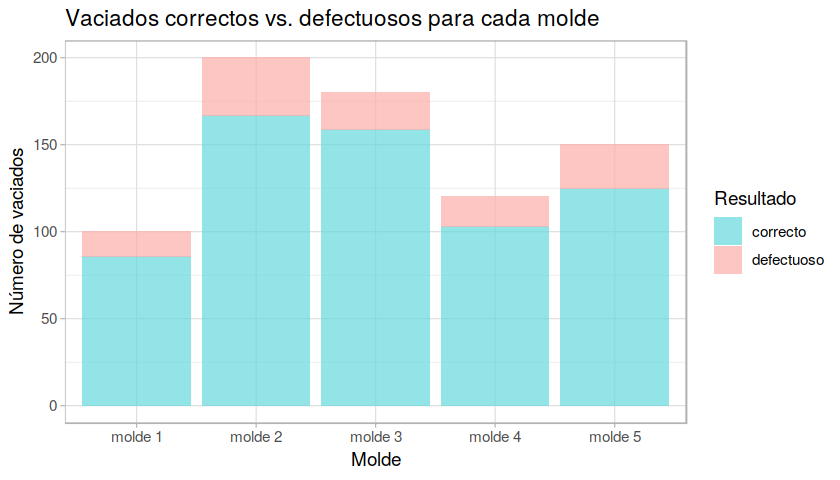

In [120]:
# Gráfico de las observaciones
molde <- rep(rownames(data), each=2)
estado <- rep(colnames(data), 5)
value <- c(rbind(y, x))
grouped_data <- data.frame(molde, estado, value)
 
ggplot(grouped_data, aes(fill=estado, y=value, x=molde)) + 
ggtitle("Vaciados correctos vs. defectuosos para cada molde") +
geom_bar(position=position_stack(reverse = TRUE), stat="identity", alpha=0.7) +
scale_fill_manual(name="Resultado", breaks=c("correcto", "defectuoso"), values=c("correcto"="#66D9DC", "defectuoso"="#FCAEA8"), labels= c("correcto", "defectuoso")) +
xlab("Molde") +
ylab("Número de vaciados") + 
theme_light()

In [118]:
result <- chisq.test(data)
result


	Pearson's Chi-squared test

data:  data
X-squared = 2.3704, df = 4, p-value = 0.668


In [4]:
alpha <- 0.01
k <- (nrow(data)-1)*(ncol(data)-1)
chisq_value <- qchisq(1-alpha, k)
display_markdown(paste("$\\chi^2_{\\nu={{4}},\\alpha={{0.01}}}=$", round(chisq_value, digits=4)))

$\chi^2_{\nu={{4}},\alpha={{0.01}}}=$ 13.2767

<div style="text-align: justify">Como $\chi^2 = 2.3704 < 13.2767$, no hay evidencia suficiente para rechazar $H_0$. Se sostiene la hipótesis de que el número de vaciados defecuosos es independiente del molde utilizado.</div>

***
<br></br>

### **Ejercicio 2**

#### <div style="text-align: justify">El propietario de un comercio debe decidir cuál de dos máquinas expendedoras de bocadillos instalar en su comercio. Si cada máquina se pone a prueba 250 veces y la primera máquina falla en su operación (no entrega el bocadillo y no devuelve el dinero) 13 veces y la segunda máquina falla 7 veces, pruebe, con el nivel de significancia de 0.05, si la diferencia entre la correspondientes proporciones muestrales es significativa.</div>

| Categoría | Operación correcta | Falla | **Total** |
|---|:---:|:---:|:---:|
| Máquina 1 | 237 | 13 | **250** |
| Máquina 2 | 243 | 7 | **250** |
<div style="text-align: center"><i>Valores observados</i></div>

<div style="text-align: center">$H_0: p_1 - p_2 = 0$&emsp;&emsp;$H_1: p_1 - p_2 \neq 0$</div>

#### <div style="text-align: justify">Para ello utilice:</div>

#### <div style="text-align: justify">a) el estadístico $\chi^2$</div>

In [7]:
x <- c(13, 7)
y <- c(237, 243)
data <- data.frame(x, y)
rownames(data) <- c("maquina 1", "maquina 2")
colnames(data) <- c("correcta", "falla")
result <- chisq.test(data, correct = F) # Sin corrección de Yates, para que de igual que haciendo el cálculo a mano
result


	Pearson's Chi-squared test

data:  data
X-squared = 1.875, df = 1, p-value = 0.1709


In [6]:
alpha <- 0.05
k <- (nrow(data)-1)*(ncol(data)-1)
chisq_value <- qchisq(1-alpha, k)
display_markdown(paste("$\\chi^2_{\\nu={{1}},\\alpha={{0.05}}}=$", round(chisq_value, digits=4)))

$\chi^2_{\nu={{1}},\alpha={{0.05}}}=$ 3.8415

<div style="text-align: justify">Como $\chi^2 = 1.875 < 3.842$, no hay evidencia suficiente para rechazar $H_0$. Se sostiene la hipótesis de que el número de fallas es independiente de la máquina utilizada.</div>

#### <div style="text-align: justify">b) el estadístico $$Z = \frac{\hat{P}_1 - \hat{P}_2}{\sqrt{\hat{P}\left(1 - \hat{P}\right)\left(\frac{1}{n_1} + \frac{1}{n_1}\right)}}$$</div>

In [19]:
n <- 250
p1_hat <- 13 / n
p2_hat <- 7 / n
p_hat <- (13 + 7) / (n + n)
z <- (p1_hat - p2_hat) / sqrt(p_hat*(1 - p_hat)*(1/n + 1/n))
p_value <- pnorm(z, mean = 0, sd = 1)
display_markdown(paste("$Z=$", round(z, digits=4)))
display_markdown(paste("$p$-$value =$", round(p_value, digits=4)))

$Z=$ 1.3693

$p$-$value =$ 0.9145

<div style="text-align: justify">Como el $p$-$valor =0.9145 > 0.05$, no hay evidencia suficiente para rechazar $H_0$. Nuevamente, se sostiene la hipótesis de que el número de fallas es independiente de la máquina utilizada.</div>

#### <div style="text-align: justify">c) Verifique que el cuadrado del valor obtenido para $Z$ en el inciso $b$ es igual al valor obtenido para $\chi^2$ en el inciso $a$.</div>

In [18]:
display_markdown(paste("$\\chi^2_{\\nu={{1}},\\alpha={{0.05}}}=$", round(result$statistic, digits=4)))
display_markdown(paste("$Z^2=$", round(z^2, digits=4)))

$\chi^2_{\nu={{1}},\alpha={{0.05}}}=$ 1.875

$Z^2=$ 1.875

***
<br></br>

### **Ejercicio 3**

#### <div style="text-align: justify">Las tuberías de enfriamiento en tres plantas de energía nuclear se investigan por depósitos que inhibirán el flujo de agua. A partir de 30 lugares seleccionados al azar en cada planta, 13 de la primera planta, 8 de la segunda planta y 19 de la tercera estaban obstruidos.</div>

| Planta | Sin obstrucción | Obstruídos | **Total** |
|---|:---:|:---:|:---:|
| Planta 1 | 17 | 13 | **30** |
| Planta 2 | 22 | 8 | **30** |
| Planta 3 | 11 | 19 | **30** |
<div style="text-align: center"><i>Valores observados</i></div>

In [128]:
x <- c(13, 8, 19)
y <- c(30-13, 30-8, 30-19)
data <- data.frame(x, y)
rownames(data) <- c("planta 1", "planta 2", "planta 3")
colnames(data) <- c("sin obstrucción", "obstruído")
data

,sin obstrucción,obstruído
planta 1,13,17
planta 2,8,22
planta 3,19,11


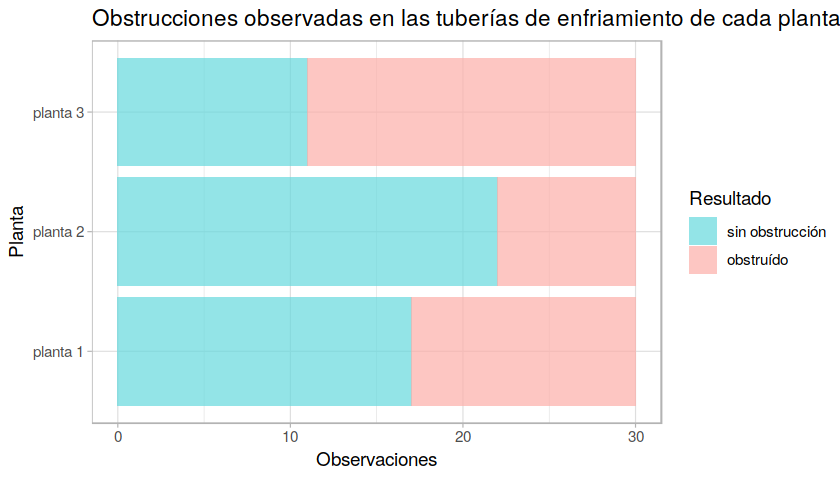

In [150]:
# Gráfico de las observaciones
planta <- rep(rownames(data), each=2)
estado <- rep(colnames(data), 3)
value <- c(rbind(y, x))
grouped_data <- data.frame(planta, estado, value)
 
ggplot(grouped_data, aes(fill=estado, y=value, x=planta)) + 
ggtitle("Obstrucciones observadas en las tuberías de enfriamiento de cada planta") +
geom_bar(position=position_stack(reverse = FALSE), stat="identity", alpha=0.7) +
scale_fill_manual(name="Resultado", breaks=c("sin obstrucción", "obstruído"), values=c("sin obstrucción"="#66D9DC", "obstruído"="#FCAEA8"), labels= c("sin obstrucción", "obstruído")) +
xlab("Planta") +
ylab("Observaciones") + 
coord_flip() + theme_light()

#### <div style="text-align: justify">a) Use el nivel de 0.05 para probar la hipótesis nula de igualdad.</div>

<div style="text-align: center">$H_0: p_1 = p_2 = p_3$&emsp;&emsp;$H_1: \text{La proporción de obstrucciones depende de la planta}$</div>

In [42]:
result <- chisq.test(data)
result


	Pearson's Chi-squared test

data:  data
X-squared = 8.19, df = 2, p-value = 0.01666


In [45]:
alpha <- 0.05
k <- (nrow(data)-1)*(ncol(data)-1)
chisq_value <- qchisq(1-alpha, k)
display_markdown(sprintf("$\\chi^2_{\\nu={{%d}},\\alpha={{%.2f}}} = %.2f$", k, alpha, chisq_value))

$\chi^2_{\nu={{2}},\alpha={{0.05}}} = 5.99$

<div style="text-align: justify">Como $\chi^2 = 8.19 > 5.99$, se rechaza $H_0$ en favor de la hipótesis alternativa de que la proporión de obstrucciones depende de la plata.</div>

#### <div style="text-align: justify">b) Grafique los intervalos de confianza para las tres probabilidades de quedar obstruido.</div>

In [55]:
test1 <- prop.test(13,30,conf.level=0.95)
test2 <- prop.test(8,30,conf.level=0.95)
test3 <- prop.test(19,30,conf.level=0.95)
display_markdown("Intervalo de confianza de 95% para la proporción de obstrucciones:")
display_markdown(paste("$\\quad \\bullet$ Planta 1: (",
                       round(test1$conf.int[1], digits = 3), ", ",
                       round(test1$conf.int[2], digits = 3), "$)$", sep=""))
display_markdown(paste("$\\quad \\bullet$ Planta 2: (",
                       round(test2$conf.int[1], digits = 3), ", ",
                       round(test2$conf.int[2], digits = 3), ")", sep=""))
display_markdown(paste("$\\quad \\bullet$ Planta 3: (",
                       round(test3$conf.int[1], digits = 3), ", ",
                       round(test3$conf.int[2], digits = 3), ")", sep=""))

Intervalo de confianza de 95% para la proporción de obstrucciones:

$\quad \bullet$ Planta 1: (0.26, 0.623$)$

$\quad \bullet$ Planta 2: (0.13, 0.462)

$\quad \bullet$ Planta 3: (0.439, 0.795)

***
<br></br>

### **Ejercicio 4**

#### <div style="text-align: justify">Se efectúa un estudio sobre las fallas de un componente electrónico. Existen cuatro tipos de fallas posibles y dos posiciones de montaje para el dispositivo. Se toman los datos siguientes</div>

<table>
    <thead>
        <tr>
            <th style="border-bottom: 2px solid #bcbcbc;"></th>
            <th colspan=4 style="text-align: center; vertical-align: middle; border-bottom: 2px solid #bcbcbc; border-left: 2px solid #bcbcbc;">Tipo de falla</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc; border-bottom: 1px solid #bcbcbc;"><b>Posición de montaje</b></td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">A</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">B</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">C</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">D</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc;">1</td>
            <td style="text-align: center; vertical-align: middle;">22</td>
            <td style="text-align: center; vertical-align: middle;">46</td>
            <td style="text-align: center; vertical-align: middle;">18</td>
            <td style="text-align: center; vertical-align: middle;">9</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc;">2</td>
            <td style="text-align: center; vertical-align: middle;">4</td>
            <td style="text-align: center; vertical-align: middle;">17</td>
            <td style="text-align: center; vertical-align: middle;">6</td>
            <td style="text-align: center; vertical-align: middle;">12</td>
        </tr>
    </tbody>
</table>
<div style="text-align: center"><i>Valores observados</i></div>

#### <div style="text-align: justify">¿Puede concluir que el tipo de falla es independiente de la posición de montaje? Utilice $\alpha = 0.01$. Hallar el p-valor de la prueba.</div>

In [154]:
x1 <- c(22, 46, 18, 9)
x2 <- c(4, 17, 6 ,12)
data <- t(data.frame(x1, x2))
colnames(data) <- c("Falla A", "Falla B", "Falla C", "Falla D")
rownames(data) <- c("Posición 1", "Posición 2")
data

,Falla A,Falla B,Falla C,Falla D
Posición 1,22,46,18,9
Posición 2,4,17,6,12


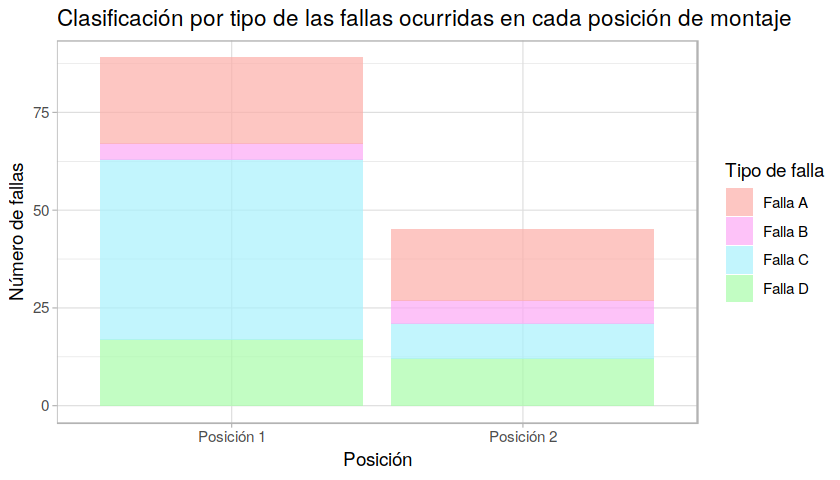

In [170]:
# Gráfico de las observaciones
posicion <- rep(rownames(data), each=4)
tipo_falla <- rep(colnames(data), 2)
value <- c(rbind(x1, x2))
grouped_data <- data.frame(posicion, tipo_falla, value)
 
ggplot(grouped_data, aes(fill=tipo_falla, y=value, x=posicion)) + 
ggtitle("Clasificación por tipo de las fallas ocurridas en cada posición de montaje") +
geom_bar(position="stack", stat="identity", alpha=0.7) +
scale_fill_manual(name="Tipo de falla", values=c("#FCAEA8", "#FCA8F5", "#A8F1FC", "#A8FCA9")) +
xlab("Posición") +
ylab("Número de fallas") + 
theme_light()

In [77]:
result <- chisq.test(data)
result


	Pearson's Chi-squared test

data:  data
X-squared = 10.706, df = 3, p-value = 0.01343


In [78]:
alpha <- 0.01
k <- (nrow(data)-1)*(ncol(data)-1)
chisq_value <- qchisq(1-alpha, k)
display_markdown(sprintf("$\\chi^2_{\\nu={{%d}},\\alpha={{%.2f}}} = %.3f$", k, alpha, chisq_value))

$\chi^2_{\nu={{3}},\alpha={{0.01}}} = 11.345$

<div style="text-align: justify">Como $\chi^2 = 10.706 < 11.345$, no hay evidencia sufieciente para rechazar $H_0$ y se concluye que el tipo de falla es independiente de la posición de montaje.</div>

In [79]:
display_markdown(sprintf("$p$-$valor = %.5f > %.2f$", result$p.value, alpha))

$p$-$valor = 0.01343 > 0.01$

***
<br></br>

### **Ejercicio 5**

#### <div style="text-align: justify">Una compañía opera cuatro máquinas tres turnos al día. De los registros de producción, se obtienen los datos siguientes sobre el número de fallas</div>

<table>
    <thead>
        <tr>
            <th style="border-bottom: 2px solid #bcbcbc;"></th>
            <th colspan=4 style="text-align: center; vertical-align: middle; border-bottom: 2px solid #bcbcbc; border-left: 2px solid #bcbcbc;">Máquina</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc; border-bottom: 1px solid #bcbcbc;"><b>Turno</b></td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">A</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">B</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">C</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">D</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc;">1</td>
            <td style="text-align: center; vertical-align: middle;">41</td>
            <td style="text-align: center; vertical-align: middle;">20</td>
            <td style="text-align: center; vertical-align: middle;">12</td>
            <td style="text-align: center; vertical-align: middle;">16</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc;">2</td>
            <td style="text-align: center; vertical-align: middle;">31</td>
            <td style="text-align: center; vertical-align: middle;">11</td>
            <td style="text-align: center; vertical-align: middle;">9</td>
            <td style="text-align: center; vertical-align: middle;">14</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc;">3</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">17</td>
            <td style="text-align: center; vertical-align: middle;">16</td>
            <td style="text-align: center; vertical-align: middle;">10</td>
        </tr>
    </tbody>
</table>
<div style="text-align: center"><i>Valores observados</i></div>

#### <div style="text-align: justify">Pruebe la hipótesis, con nivel de significancia 0.05, de que el número de fallas es independiente del turno. Encuentre el P-valor de la prueba.</div>

In [151]:
x1 <- c(41, 20, 12, 16)
x2 <- c(31, 11, 9, 14)
x3 <- c(15, 17, 16, 10)
data <- t(data.frame(x1, x2, x3))
colnames(data) <- c("Máquina A", "Máquina B", "Máquina C", "Máquina D")
rownames(data) <- c("Turno 1", "Turno 2", "Turno 3")
data

,Máquina A,Máquina B,Máquina C,Máquina D
Turno 1,41,20,12,16
Turno 2,31,11,9,14
Turno 3,15,17,16,10


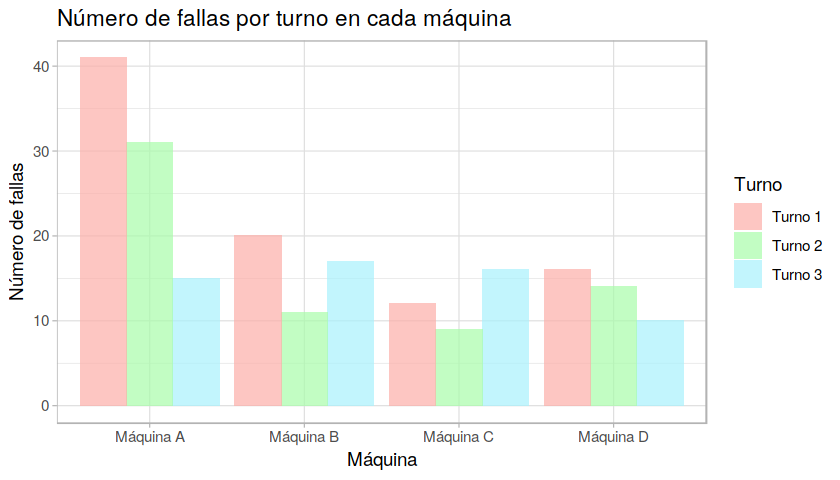

In [153]:
# Gráfico de las observaciones
maquina <- rep(colnames(data), each=3)
turno <- rep(rownames(data), 4)
value <- c(rbind(x1, x2, x3))
grouped_data <- data.frame(maquina, turno, value)
 
ggplot(grouped_data, aes(fill=turno, y=value, x=maquina)) + 
ggtitle("Número de fallas por turno en cada máquina") +
geom_bar(position="dodge", stat="identity", alpha=0.7) +
scale_fill_manual(name="Turno", values=c("#FCAEA8", "#A8FCA9", "#A8F1FC")) +
xlab("Máquina") +
ylab("Número de fallas") + theme_light()

In [71]:
result <- chisq.test(data)
result


	Pearson's Chi-squared test

data:  data
X-squared = 11.649, df = 6, p-value = 0.07027


In [72]:
alpha <- 0.05
k <- (nrow(data)-1)*(ncol(data)-1)
chisq_value <- qchisq(1-alpha, k)
display_markdown(sprintf("$\\chi^2_{\\nu={{%d}},\\alpha={{%.2f}}} = %.3f$", k, alpha, chisq_value))

$\chi^2_{\nu={{6}},\alpha={{0.05}}} = 12.592$

<div style="text-align: justify">Como $\chi^2 = 11.649 < 12.592$, no hay evidencia sufieciente para rechazar $H_0$ y se concluye que el número de fallas es independiente del turno.</div>

In [73]:
display_markdown(sprintf("$p$-$valor = %.5f > %.2f$", result$p.value, alpha))

$p$-$valor = 0.07027 > 0.05$

***
<br></br>

### **Ejercicio 6**

#### <div style="text-align: justify">Un grupo de estudiantes de Ingeniería civil ha registrado el número de automóviles que transitan hacia el este en la intersección de dos avenidas y obtienen los siguientes datos</div>

<table>
    <thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc; border-bottom: 1px solid #bcbcbc;"><b>Vehículos por minuto</b></td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">40</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">41</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">42</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">43</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">44</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">45</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">46</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">47</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">48</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">49</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">50</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">51</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">52</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">53</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">54</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">55</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">56</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">57</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">58</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">59</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">60</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">61</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">62</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">63</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">64</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">65</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc;"><b>Frecuencia observada</b></td>
            <td style="text-align: center; vertical-align: middle;">14</td>
            <td style="text-align: center; vertical-align: middle;">24</td>
            <td style="text-align: center; vertical-align: middle;">57</td>
            <td style="text-align: center; vertical-align: middle;">111</td>
            <td style="text-align: center; vertical-align: middle;">194</td>
            <td style="text-align: center; vertical-align: middle;">256</td>
            <td style="text-align: center; vertical-align: middle;">296</td>
            <td style="text-align: center; vertical-align: middle;">378</td>
            <td style="text-align: center; vertical-align: middle;">250</td>
            <td style="text-align: center; vertical-align: middle;">185</td>
            <td style="text-align: center; vertical-align: middle;">171</td>
            <td style="text-align: center; vertical-align: middle;">150</td>
            <td style="text-align: center; vertical-align: middle;">110</td>
            <td style="text-align: center; vertical-align: middle;">102</td>
            <td style="text-align: center; vertical-align: middle;">96</td>
            <td style="text-align: center; vertical-align: middle;">90</td>
            <td style="text-align: center; vertical-align: middle;">81</td>
            <td style="text-align: center; vertical-align: middle;">73</td>
            <td style="text-align: center; vertical-align: middle;">64</td>
            <td style="text-align: center; vertical-align: middle;">61</td>
            <td style="text-align: center; vertical-align: middle;">59</td>
            <td style="text-align: center; vertical-align: middle;">50</td>
            <td style="text-align: center; vertical-align: middle;">42</td>
            <td style="text-align: center; vertical-align: middle;">29</td>
            <td style="text-align: center; vertical-align: middle;">18</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
        </tr>
    </tbody>
</table>
<div style="text-align: center"><i>Valores observados</i></div>

#### <div style="text-align: justify">Para este proceso, ¿la hipótesis de una distribución Poisson resulta ser un modelo de probabilidad apropiado? Utilice $\alpha = 0.05$. Calcule el $p$-$valor$.</div>

In [134]:
x <- 40:65
frec <- c(14, 24, 57, 111, 194, 256, 296, 378, 250, 185, 171, 150, 110, 102, 96, 90, 81, 73, 64, 61, 59, 50, 42, 29, 18, 15)
data <- t(data.frame(x, frec))
rownames(data) <- c("Vehículos por minuto", "Frecuencia observada")
data

Vehículos por minuto,40,41,42,43,44,45,46,47,48,49,...,56,57,58,59,60,61,62,63,64,65
Frecuencia observada,14,24,57,111,194,256,296,378,250,185,...,81,73,64,61,59,50,42,29,18,15


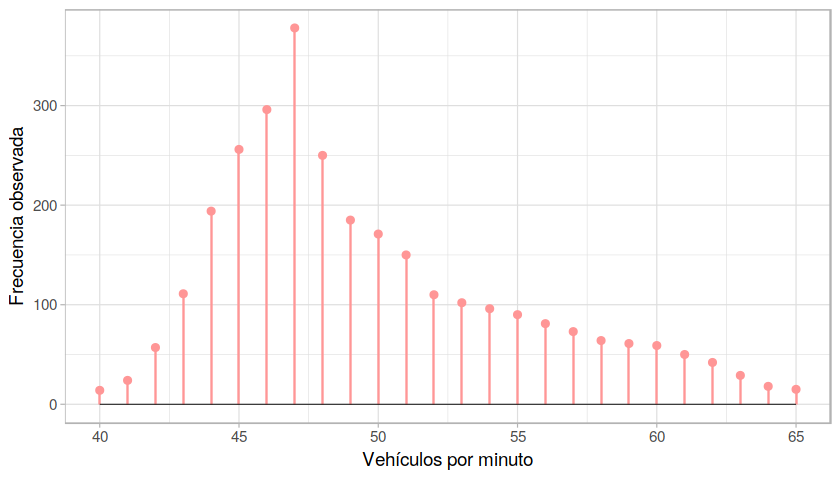

In [136]:
# Gráfico de los valores observados
options(repr.plot.width=7, repr.plot.height=4)
df <- data.frame(x, frec)
ggplot(df, aes(x=x, y=frec)) +
geom_point(color= '#ff9696') +
geom_segment(aes(x=x, xend=x, y=0, yend=frec), color='#ff9696') +
geom_line(aes(x, 0), color = 'black', size = .2) +
xlab("Vehículos por minuto") +
ylab("Frecuencia observada") + theme_light()

In [10]:
N <- sum(frec)
n <- length(x)
lambda <- sum(x * frec) / N
e <- N * dpois(x, lambda) # P(X = x)
e[1] <- N * ppois(x[1], lambda) # P(X <= 40)
e[n] <- N * (1 - ppois(x[n - 1], lambda)) # P(X >= 65)
chi_sq <- sum((x - e)^2 / e)
display_markdown(sprintf("$\\chi^2 = %.2f$", chi_sq))

$\chi^2 = 1302.81$

In [11]:
p <- 1 #se estima 1 parámetro
k <- n - p - 1 
alpha <- 0.05
chisq_value <- qchisq(1-alpha, k)
display_markdown(sprintf("$\\chi^2_{\\nu={{%d}},\\alpha={{%.2f}}} = %.2f$", k, alpha, chisq_value))

$\chi^2_{\nu={{24}},\alpha={{0.05}}} = 36.42$

<div style="text-align: justify">Como $\chi^2 = 1302.81 > 36.42$, se rechaza la hipótesis de que los datos obtenidos provienen de un distribución Poisson.</div>

In [12]:
p_valor <- 1- pchisq(chi_sq, k)
display_markdown(sprintf("$p$-$valor = %.0f < %.2f$", p_valor, alpha))

$p$-$valor = 0 < 0.05$

***
<br></br>

### **Ejercicio 7**

#### <div style="text-align: justify">Se diseña un generador de números seudoaleatorios de modo que los enteros 0 a 9 tengan la misma probabilidad de ocurrencia. Los primeros 10000 números son</div>

<table>
    <thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc; border-bottom: 1px solid #bcbcbc;"><b>Número</b></td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">0</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">1</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">3</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">4</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">5</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">6</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">7</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">8</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">9</td>            
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc;"><b>Frecuencia observada</b></td>
            <td style="text-align: center; vertical-align: middle;">967</td>
            <td style="text-align: center; vertical-align: middle;">1008</td>
            <td style="text-align: center; vertical-align: middle;">975</td>
            <td style="text-align: center; vertical-align: middle;">1022</td>
            <td style="text-align: center; vertical-align: middle;">1003</td>
            <td style="text-align: center; vertical-align: middle;">989</td>
            <td style="text-align: center; vertical-align: middle;">1001</td>
            <td style="text-align: center; vertical-align: middle;">981</td>
            <td style="text-align: center; vertical-align: middle;">1043</td>  
            <td style="text-align: center; vertical-align: middle;">1011</td>  
        </tr>
    </tbody>
</table>
<div style="text-align: center"><i>Valores observados</i></div>

#### <div style="text-align: justify">¿El generador trabaja de manera apropiada? Utilice $\alpha = 0.01$. Calcule el $p$-$valor$.</div>

<div style="text-align: justify">Sea $p_i$ la probabilidad de ocurrencia del número $i$:</div>

<div style="text-align: center">$H_0: p_0 = p_1 = \ldots = p_9 = 0.1$</div>

In [50]:
x <- 0:9
freq <- c(967, 1008, 975, 1022, 1003, 989, 1001, 981, 1043, 1011)
n <- 10000
df <- data.frame(x, freq)
data <- t(df)
rownames(data) <- c("Número", "Frecuencia")
data

Número,0,1,2,3,4,5,6,7,8,9
Frecuencia,967,1008,975,1022,1003,989,1001,981,1043,1011


In [51]:
e <- n / length(x) # valor esperado
df_unif <- data.frame(x=x, freq=rep(e, length(x))) # distribución uniforme discreta en el rango 0-9
all_values <- rbind(df,df_unif)
all_values$dataset <- c(rep("observada", nrow(df)), rep("esperada", nrow(df_unif)))

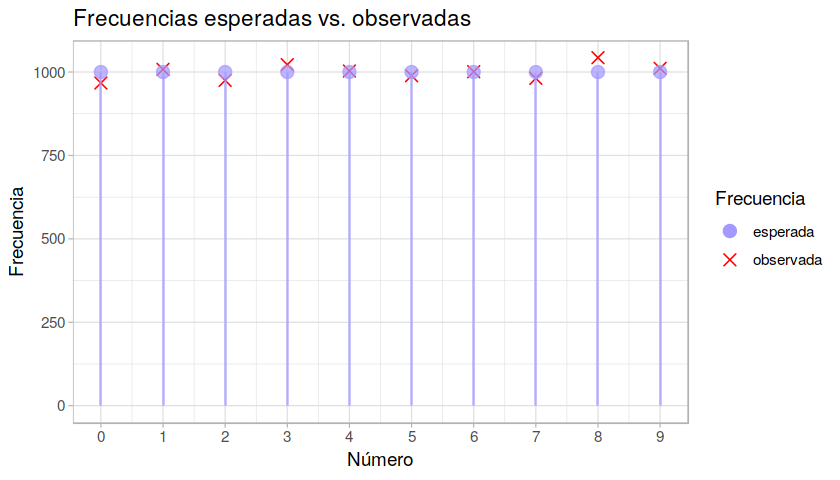

In [53]:
# Gráfico
options(repr.plot.width=7, repr.plot.height=4)
df <- data.frame(x, freq)
ggplot(all_values, aes(x=all_values$x, y=all_values$freq, col=dataset, shape=dataset, alpha=dataset)) +
ggtitle("Frecuencias esperadas vs. observadas") +
geom_point(size=3) +
geom_segment(aes(x=all_values$x, xend=all_values$x, y=0, yend=e), color='#a399ff', alpha=0.5) +
scale_color_manual(name="Frecuencia ", labels = c("esperada","observada"), values=c("#a399ff", "red")) +
scale_shape_manual(name="Frecuencia ", labels = c("esperada","observada"), values=c(19,4)) +
scale_alpha_manual(name="Frecuencia ", labels = c("esperada","observada"), values=c(0.7,1), guide="none") +
scale_x_continuous(breaks = function(x) seq(floor(min(x)), ceiling(max(x)))) +
xlab("Número") +
ylab("Frecuencia") + theme_light()

<div style="text-align: justify">Para que el generador trabaje de forma apropiada, la distribución de los valores generados debe ser uniforme discreta en el rango de interés.</div>

In [109]:
chi_sq <- sum((freq - e)^2 / e)
display_markdown(sprintf("$\\chi^2 = %.2f$", chi_sq))

$\chi^2 = 4.72$

In [111]:
k <- length(x) - 1 
alpha <- 0.01
chisq_value <- qchisq(1-alpha, k)
display_markdown(sprintf("$\\chi^2_{\\nu={{%d}},\\alpha={{%.2f}}} = %.2f$", k, alpha, chisq_value))

$\chi^2_{\nu={{9}},\alpha={{0.01}}} = 21.67$

<div style="text-align: justify">Como $\chi^2 = 4.72 < 21.67$, no hay evidencia sufieciente para rechazar $H_0$ y se concluye que el generador trabaja de forma apropiada.</div>

In [115]:
p_valor <- 1 - pchisq(chi_sq, k)
display_markdown(sprintf("$p$-$valor = %.2f > %.2f$", p_valor, alpha))

$p$-$valor = 0.86 > 0.01$

***
<br></br>

### **Ejercicio 8**

#### <div style="text-align: justify">Se observa y anota la duración de un ciclo de una máquina automática</div>

<table>
    <thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc; border-bottom: 1px solid #bcbcbc;"><b>Segundos</b></td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2.10</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2.11</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2.12</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2.13</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2.14</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2.15</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2.16</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2.17</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2.18</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2.19</td>     
            <td style="text-align: center; vertical-align: middle; border-bottom: 1px solid #bcbcbc;">2.20</td> 
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 2px solid #bcbcbc;"><b>Frecuencia</b></td>
            <td style="text-align: center; vertical-align: middle;">16</td>
            <td style="text-align: center; vertical-align: middle;">28</td>
            <td style="text-align: center; vertical-align: middle;">41</td>
            <td style="text-align: center; vertical-align: middle;">74</td>
            <td style="text-align: center; vertical-align: middle;">149</td>
            <td style="text-align: center; vertical-align: middle;">256</td>
            <td style="text-align: center; vertical-align: middle;">137</td>
            <td style="text-align: center; vertical-align: middle;">82</td>
            <td style="text-align: center; vertical-align: middle;">40</td>  
            <td style="text-align: center; vertical-align: middle;">19</td>  
            <td style="text-align: center; vertical-align: middle;">11</td>  
        </tr>
    </tbody>
</table>
<div style="text-align: center"><i>Valores observados</i></div>

#### <div style="text-align: justify">¿La probabilidad normal parece ser un modelo de probabilidad razonable para la duración del ciclo? Utilice la prueba ji-cuadrada de bondad de ajuste, con $\alpha = 0.05$. Calcule el $p$-$valor$.</div>

<div style="text-align: justify">Sea $X$ una variable aleatoria que representa la duración de un ciclo:</div>

<div style="text-align: center">$H_0: X \sim N\left(u, \sigma^2\right)$</div>

In [26]:
sec <- c(2.10, 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.20)
freq <- c(16, 28, 41, 74, 149, 256, 137, 82, 40, 19, 11)
n <- sum(freq)
df <- data.frame(sec, freq)
data <- t(df)
rownames(data) <- c("Segundos", "Frecuencia")
data

Segundos,2.1,2.11,2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.2
Frecuencia,16.0,28.00,41.00,74.00,149.00,256.00,137.00,82.00,40.00,19.00,11.0


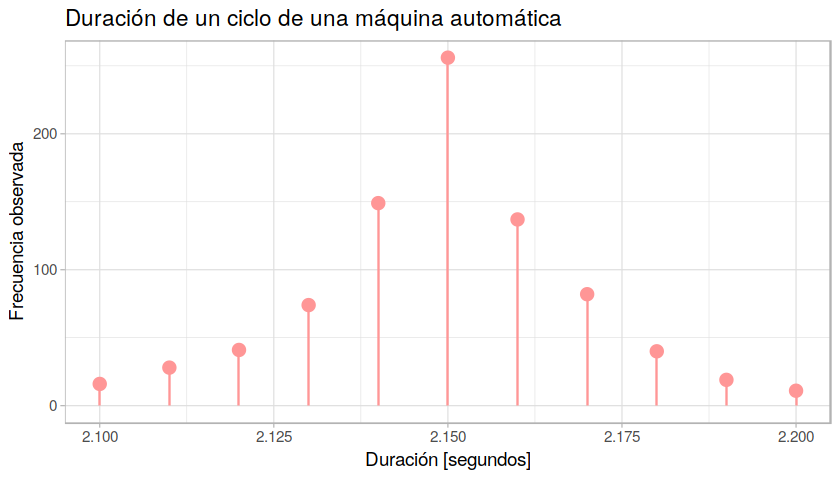

In [46]:
# Gráfico de las observaciones
options(repr.plot.width=7, repr.plot.height=4)
ggplot(df, mapping = aes(x=sec, y=freq)) +
ggtitle("Duración de un ciclo de una máquina automática") +
geom_point(col="#ff9696", size=3) +
geom_segment(aes(x=sec, xend=sec, y=0, yend=freq), color='#ff9696') +
xlab("Duración [segundos]") +
ylab("Frecuencia observada") + theme_light()

In [21]:
k <- 8 # número de celdas
p <- seq(from = 0, to = 1, by = 1/k) # elijo que cada celda tenga la misma probabilidad
mu <- mean(freq) # media estimada
std <- sd(freq) # desviación standard estimada
x <- qnorm(p, mu, std) # cuantiles para cada probabilidad
count <- colSums(outer(freq, x, `<`)) # cantidad de valores menores que cada cuantil
interval_count <- diff(count) # cantidad de valores dentro de cada intervalo (celda)
e <- n/k # valor esperado
chi_sq <- sum(((interval_count - e)^2) / e)
display_markdown(sprintf("$\\chi^2 = %.2f$", chi_sq))

$\chi^2 = 7.18$

In [23]:
alpha <- 0.05
df <- k - 2 - 1 # Grados de libertad. Se estiman 2 parámetros
chisq_value <- qchisq(1-alpha, df)
display_markdown(sprintf("$\\chi^2_{\\nu={{%d}},\\alpha={{%.2f}}} = %.2f$", df, alpha, chisq_value))

$\chi^2_{\nu={{5}},\alpha={{0.05}}} = 11.07$

<div style="text-align: justify">Como $\chi^2 = 7.18 < 11.07$, no hay evidencia sufieciente para rechazar $H_0$ y se acepta que la duración de un ciclo de la máquina sigue una distribución normal.</div>

In [24]:
p_valor <- 1 - pchisq(chi_sq, k)
display_markdown(sprintf("$p$-$valor = %.2f > %.2f$", p_valor, alpha))

$p$-$valor = 0.52 > 0.05$

***
<br></br>

### **Ejercicio 9**

#### <div style="text-align: justify">Se ha teorizado el tiempo de respuesta de un sistema computarizado, a una petición de cierto tipo de información, como una distribución exponencial con parámetro $\lambda=1$</div>

#### <div style="text-align: justify">a) Si se hicieran $n$ observaciones y se desea usar la prueba ji-cuadrado con cinco intervalos de clase de igual probabilidad bajo la hipótesis nula, ¿cuáles serían los intervalos de clase resultante?</div>

<div style="text-align: justify">Sea $X$ una variable aleatoria que representa el tiempo de respuesta de un sistema computarizado:</div>

<div style="text-align: center">$H_0: X \sim Exp\left(1\right)$</div>

In [19]:
lambda <- 1
k <- 5 # cantidad de intervalos de clase
p <- seq(from = 0, to = 1, by = 1/k) # igual probabilidad en cada intervalo
x <- qexp(p, rate=lambda) #cuantiles
intervals <- rep('', k)

for (i in 1:length(x)-1)
{
    if(i != length(x)-1) {
        intervals[i] <- sprintf("$\\bullet\\quad\\text{Intervalo %d}:\\quad%.4f < x \\le %.4f$", i, x[i], x[i+1])
        display_markdown(intervals[i])
    }
    else {
        intervals[i] <- sprintf("$\\bullet\\quad\\text{Intervalo %d}:\\quad%.4f < x < %.4f$", i, x[i], x[i+1])
        display_markdown(intervals[i])
    }
}

$\bullet\quad\text{Intervalo 1}:\quad0.0000 < x \le 0.2231$

$\bullet\quad\text{Intervalo 2}:\quad0.2231 < x \le 0.5108$

$\bullet\quad\text{Intervalo 3}:\quad0.5108 < x \le 0.9163$

$\bullet\quad\text{Intervalo 4}:\quad0.9163 < x \le 1.6094$

$\bullet\quad\text{Intervalo 5}:\quad1.6094 < x < Inf$

#### <div style="text-align: justify">b) Realice la prueba ji-cuadrado utilizando los siguientes datos de una muestra aleatoria de 40 tiempos de respuesta:</div>

<table>
    <thead>
    <tbody>
        <tr>
            <th colspan="20" style="text-align: center; vertical-align: middle; border-bottom: 1px solid black">Tiempos de respuesta</th>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle;">0.10</td>
            <td style="text-align: center; vertical-align: middle;">0.99</td>
            <td style="text-align: center; vertical-align: middle;">1.14</td>
            <td style="text-align: center; vertical-align: middle;">1.26</td>
            <td style="text-align: center; vertical-align: middle;">3.24</td>
            <td style="text-align: center; vertical-align: middle;">0.12</td>
            <td style="text-align: center; vertical-align: middle;">0.26</td>
            <td style="text-align: center; vertical-align: middle;">0.80</td>
            <td style="text-align: center; vertical-align: middle;">0.79</td>
            <td style="text-align: center; vertical-align: middle;">1.16</td>
            <td style="text-align: center; vertical-align: middle;">1.76</td>
            <td style="text-align: center; vertical-align: middle;">0.41</td>
            <td style="text-align: center; vertical-align: middle;">0.59</td>
            <td style="text-align: center; vertical-align: middle;">0.27</td>
            <td style="text-align: center; vertical-align: middle;">2.22</td>
            <td style="text-align: center; vertical-align: middle;">0.66</td>
            <td style="text-align: center; vertical-align: middle;">0.71</td>
            <td style="text-align: center; vertical-align: middle;">2.21</td>
            <td style="text-align: center; vertical-align: middle;">0.68</td>
            <td style="text-align: center; vertical-align: middle;">0.43</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle;">0.11</td>
            <td style="text-align: center; vertical-align: middle;">0.46</td>
            <td style="text-align: center; vertical-align: middle;">0.69</td>
            <td style="text-align: center; vertical-align: middle;">0.38</td>
            <td style="text-align: center; vertical-align: middle;">0.91</td>
            <td style="text-align: center; vertical-align: middle;">0.55</td>
            <td style="text-align: center; vertical-align: middle;">0.81</td>
            <td style="text-align: center; vertical-align: middle;">2.51</td>
            <td style="text-align: center; vertical-align: middle;">2.77</td>
            <td style="text-align: center; vertical-align: middle;">0.16</td>
            <td style="text-align: center; vertical-align: middle;">1.11</td>
            <td style="text-align: center; vertical-align: middle;">0.02</td>
            <td style="text-align: center; vertical-align: middle;">2.13</td>
            <td style="text-align: center; vertical-align: middle;">0.19</td>
            <td style="text-align: center; vertical-align: middle;">1.21</td>
            <td style="text-align: center; vertical-align: middle;">1.13</td>
            <td style="text-align: center; vertical-align: middle;">2.93</td>
            <td style="text-align: center; vertical-align: middle;">2.14</td>
            <td style="text-align: center; vertical-align: middle;">0.34</td>
            <td style="text-align: center; vertical-align: middle;">0.44</td>
        </tr>
    </tbody>
</table>
<div style="text-align: center"><i>Valores observados</i></div>

In [20]:
data <- c(0.10, 0.99, 1.14, 1.26, 3.24, 0.12, 0.26, 0.80, 0.79, 1.16, 1.76, 0.41, 0.59, 0.27, 2.22, 0.66, 0.71, 2.21, 0.68, 0.43, 0.11, 0.46, 0.69, 0.38, 0.91, 0.55, 0.81, 2.51, 2.77, 0.16, 1.11, 0.02, 2.13, 0.19, 1.21, 1.13, 2.93, 2.14, 0.34, 0.44)
n <- length(data)

In [21]:
count <- colSums(outer(data, x, `<`)) # cantidad de valores menores que cada cuantil
interval_count <- diff(count) # cantidad de valores dentro de cada intervalo (celda)
e <- n/k # valor esperado
chi_sq <- sum(((interval_count - e)^2) / e)
display_markdown(sprintf("$\\chi^2 = %.2f$", chi_sq))

$\chi^2 = 1.25$

In [23]:
alpha <- 0.05
df <- k - 1 # Grados de libertad
chisq_value <- qchisq(1-alpha, df)
display_markdown(sprintf("Utilizando un nivel de significancia $\\alpha = %.2f$:", alpha))
display_markdown(sprintf("$\\chi^2_{\\nu={{%d}},\\alpha={{%.2f}}} = %.2f$", df, alpha, chisq_value))

Utilizando un nivel de significancia $\alpha = 0.05$:

$\chi^2_{\nu={{4}},\alpha={{0.05}}} = 9.49$

<div style="text-align: justify">Como $\chi^2 = 1.25 < 9.49$, no hay evidencia sufieciente para rechazar $H_0$ y se acepta que el tiempo de respuesta tiene una distribución exponencial con parámetro $\lambda = 1$.</div>

In [24]:
p_valor <- 1 - pchisq(chi_sq, k)
display_markdown(sprintf("$p$-$valor = %.2f > %.2f$", p_valor, alpha))

$p$-$valor = 0.94 > 0.05$

<br></br>
***
<br></br>